In [1]:
import numpy as np
from numpy import exp, log, multiply

def sigmoid(w, x):
    return 1/float(1+exp(-x.dot(w)))


def cost(X, Y, w):
    sx = sigmoid(w, X)
    return -multiply(Y, log(sx)) + multiply(1 - Y, log(1 - sx))


def cost_prime(X, Y, w, lmbda=0):
    """MSE function derivative. Compuetes all derivatives at once using matrix multiplication."""
    m = float(X.shape[0])
    
#     scaled_error = h(X, w) - Y
#     lambda_part = lmbda/m * w
#     lambda_part[0] = 0                        # bias is not regularized
    lambda_part = 0
    return 1/m * (X.T).dot(scaled_error) + lambda_part


def gradient_decent(X, Y, w, alpha=0.2, lmbda=0, epsilon=1e-5):
    old_cost = 0
    current_cost = 1e500
    m = float(w.shape[0])
    cost_history= list()
    
    itr = 0
    while abs(old_cost - current_cost) > epsilon and itr < 50:
        itr += 1
        
        old_cost, current_cost = current_cost, cost(X, Y, w)
        cost_history.append(old_cost)
        w -= alpha / m * cost_prime(X, Y, w, lmbda)
        
    return w, cost_history


def logistic_regression(X, Y, alpha=0.01, lmbda=0):
    # TODO: feature scaling
    
    # prep-work: adding bias, initialising weights
    X = np.concatenate((np.ones(m, 1), X), axis=1)
    w = np.random.uniform(-0.5, 0.5, (n+1, 1))
    
    w_star, cost_history = gradient_decent(X, Y, w, alpha, lmbda)
    return w_star, cost_history



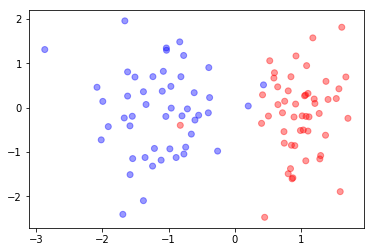

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, Y = make_classification(n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, n_informative=1)
Y = Y[:, np.newaxis]

colours = list(map(lambda x: "red" if x else "blue", Y))
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, color=colours)
plt.show()

# call regressor

